### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

### Input features:
Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
### Output Module:
Number of predicted wins (W)

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

Imported Basic Library

In [2]:
df_baseball=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df_baseball

W    R    AB     H   2B  3B   HR  ...   RA   ER   ERA  CG  SHO  SV    E
0    95  724  5575  1497  300  42  139  ...  641  601  3.73   2    8  56   88
1    83  696  5467  1349  277  44  156  ...  700  653  4.07   2   12  45   86
2    81  669  5439  1395  303  29  141  ...  640  584  3.67  11   10  38   79
3    76  622  5533  1381  260  27  136  ...  701  643  3.98   7    9  37  101
4    74  689  5605  1515  289  49  151  ...  803  746  4.64   7   12  35   86
5    93  891  5509  1480  308  17  232  ...  670  609  3.80   7   10  34   88
6    87  764  5567  1397  272  19  212  ...  698  652  4.03   3    4  48   93
7    81  713  5485  1370  246  20  217  ...  693  646  4.05   0   10  43   77
8    80  644  5485  1383  278  32  167  ...  642  604  3.74   1   12  60   95
9    78  748  5640  1495  294  33  161  ...  753  694  4.31   3   10  40   97
10   88  751  5511  1419  279  32  172  ...  733  680  4.24   5    9  45  119
11   86  729  5459  1363  278  26  230  ...  618  572  3.57   5   13  39   85
12   85  661  5417  1331  243  21  176  ...  675  630  3.94   2   12  46   93
13   76  656  5544  1379  262  22  198  ...  726  677  4.16   6   12  45   94
14   68  694  5600  1405  277  46  146  ...  729  664  4.14   5   15  28  126
15  100  647  5484  1386  288  39  137  ...  525  478  2.94   1   15  62   96
16   98  697  5631  1462  292  27  140  ...  596  532  3.21   0   13  54  122
17   97  689  5491  1341  272  30  171  ...  608  546  3.36   6   21  48  111
18   68  655  5480  1378  274  34  145  ...  737  682  4.28   1    7  40  116
19   64  640  5571  1382  257  27  167  ...  754  700  4.33   2    8  35   90
20   90  683  5527  1351  295  17  177  ...  613  557  3.43   1   14  50   88
21   83  703  5428  1363  265  13  177  ...  635  577  3.62   4   13  41   90
22   71  613  5463  1420  236  40  120  ...  678  638  4.02   0   12  35   77
23   67  573  5420  1361  251  18  100  ...  760  698  4.41   3   10  44   90
24   63  626  5529  1374  272  37  130  ...  809  749  4.69   1    7  35  117
25   92  667  5385  1346  263  26  187  ...  595  553  3.44   6   21  47   75
26   84  696  5565  1486  288  39  136  ...  627  597  3.72   7   18  41   78
27   79  720  5649  1494  289  48  154  ...  713  659  4.04   1   12  44   86
28   74  650  5457  1324  260  36  148  ...  731  655  4.09   1    6  41   92
29   68  737  5572  1479  274  49  186  ...  844  799  5.04   4    4  36   95

[30 rows x 17 columns]

Load dataset and displayed the data.

In [3]:
df_baseball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Checked null value in dataset, there are no any null value is present.

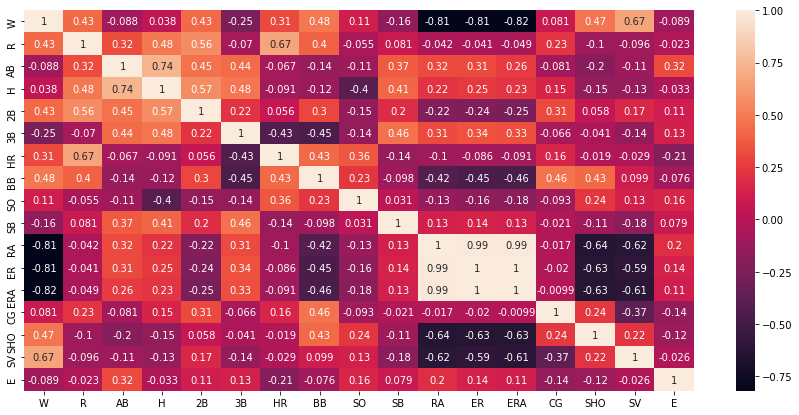

In [4]:
plt.figure(figsize=(15,7))
sns.heatmap(df_baseball.corr(),annot=True)

Displayed Correlation Heatmap, some of features are highy correlated and some are less.

In [5]:
print(df_baseball.skew())
print("Total count of numeric features: ",len(df_baseball.skew()))
print("count of features which are significantly skewed: ",len(df_baseball.skew().loc[abs(df_baseball.skew())>0.5]))

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64
Total count of numeric features:  17
count of features which are significantly skewed:  7


17 Numeric features there are 7 skewed feature are present.

In [6]:
pip install -U dataprep

Requirement already up-to-date: dataprep in /usr/local/lib/python3.7/dist-packages (0.3.0)


DataPrep Report
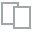
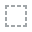
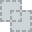
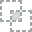
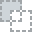
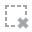
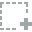
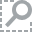
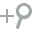
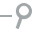
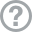
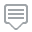
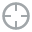
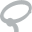
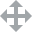
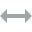
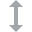
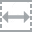
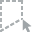
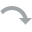
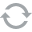
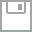
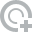
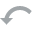
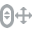
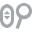
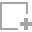
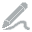
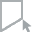
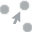
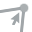
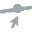

In [7]:
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
create_report(df_baseball)

Using dataprep displayed all EDA part of dataset and analysis.

In [8]:
import numpy as np
for index in df_baseball.skew().index:
    if df_baseball.skew().loc[index]>0.5:
        df_baseball[index]=np.log1p(df_baseball[index])
    if df_baseball.skew().loc[index]<-0.5:
        df_baseball[index]=np.square(df_baseball[index])
print(df_baseball.skew())
print("Total count of numeric features: ",len(df_baseball.skew()))
print("count of features which are significantly skewed: ",len(df_baseball.skew().loc[abs(df_baseball.skew())>0.5]))

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR    -0.009528
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.093545
SV     0.163057
E      0.632916
dtype: float64
Total count of numeric features:  17
count of features which are significantly skewed:  3


After skewed there are 3 significantly skewed features still present.

In [9]:
from scipy.stats import zscore
z_score=abs(zscore(df_baseball))
print(df_baseball.shape)
df_baseball_final=df_baseball.loc[(z_score<3).all(axis=1)]
print(df_baseball_final.shape)

(30, 17)
(29, 17)


After removed outlier there are one row has been removed.

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(df_baseball_final)
df_baseball=sc.transform(df_baseball_final)
df_baseball=pd.DataFrame(df_baseball,columns=df_baseball_final.columns)

All dataset has been scalled in same scale.

In [11]:
df_baseball

W         R        AB  ...       SHO        SV         E
0   1.416025  0.952719  0.830084  ... -0.784917  1.554812 -0.435733
1   0.239947  0.356659 -0.702831  ...  0.255799  0.296229 -0.598110
2   0.043934 -0.241239 -1.100253  ... -0.236912 -0.672787 -1.197382
3  -0.446099 -1.341932  0.233951  ... -0.503159 -0.825263  0.538291
4  -0.642112  0.203902  1.255894  ...  0.255799 -1.142637 -0.598110
5   0.631973  1.765462  0.716535  ... -2.114661  0.667088 -0.045239
6   0.043934  0.721344 -0.447345  ... -0.236912  0.035297 -1.378259
7  -0.054073 -0.816734 -0.447345  ...  0.255799  1.952930  0.105172
8  -0.250086  1.445583  1.752672  ... -0.236912 -0.379227  0.252482
9   0.729980  1.506078 -0.078310  ... -0.503159  0.296229  1.699369
10  0.533967  1.056731 -0.816380  ...  0.484994 -0.524172 -0.680704
11  0.435960 -0.423027 -1.412514  ...  0.255799  0.422470 -0.045239
12 -0.446099 -0.537764  0.390081  ...  0.255799  0.296229  0.030362
13 -1.230151  0.313171  1.184926  ...  0.914448 -2.411864  2.104416
14  1.906058 -0.746508 -0.461539  ...  0.914448  2.142301  0.179207
15  1.710045  0.378356  1.624929  ...  0.484994  1.345147  1.875780
16  1.612039  0.203902 -0.362183  ...  2.024177  0.667088  1.206466
17 -1.230151 -0.560816 -0.518313  ... -1.084276 -0.379227  1.518492
18 -1.622177 -0.910879  0.773310  ... -0.784917 -1.142637 -0.276965
19  0.925993  0.071729  0.148789  ...  0.704238  0.901919 -0.435733
20  0.239947  0.507889 -1.256383  ...  0.484994 -0.237774 -0.276965
21 -0.936131 -1.562151 -0.759605  ...  0.255799 -1.142637 -1.378259
22 -1.328158 -2.581641 -1.369933  ... -0.236912  0.167213 -0.276965
23 -1.720184 -1.245076  0.177176  ... -1.084276 -1.142637  1.579295
24  1.122006 -0.286482 -1.866711  ...  2.024177  0.546053 -1.563835
25  0.337954  0.356659  0.688148  ...  1.498329 -0.237774 -1.287248
26 -0.152079  0.868992  1.880415  ...  0.255799  0.167213 -0.598110
27 -0.642112 -0.676607 -0.844767  ... -1.403717 -0.237774 -0.121649
28 -1.230151  1.221678  0.787503  ... -2.114661 -0.981805  0.105172

[29 rows x 17 columns]

Displayed all data in same scaled.

In [12]:
x=df_baseball.drop(['W'], axis=1)
y=df_baseball[['W']]
print((x.shape),(y.shape))

(29, 16) (29, 1)


Seprate dependent and independent feature from dataset.

### Feature Importance

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [14]:

print(model.feature_importances_)

[0.05872478 0.01298274 0.01871808 0.02343527 0.00682249 0.02928988
 0.01865238 0.03077364 0.01178824 0.19570585 0.14966159 0.18438224
 0.01449117 0.02084644 0.20274808 0.02097713]


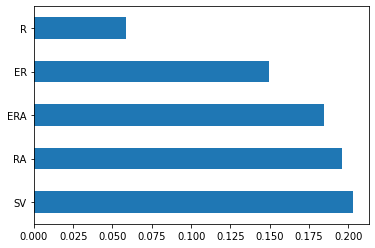

In [15]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

ploted best 5 graph of feature importances for better visualization

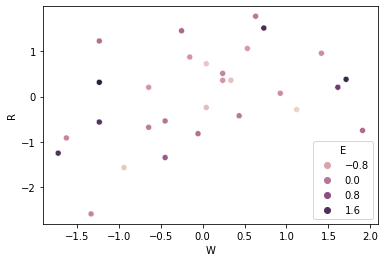

In [16]:
sns.scatterplot(x='W',y='R',hue='E',data=df_baseball)

Relations between wining relation between R

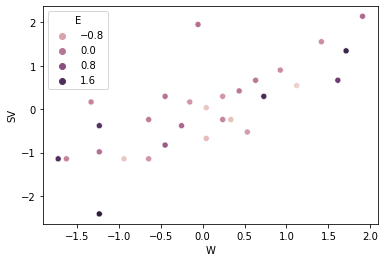

In [17]:
sns.scatterplot(x='W',y='SV',hue='E',data=df_baseball)

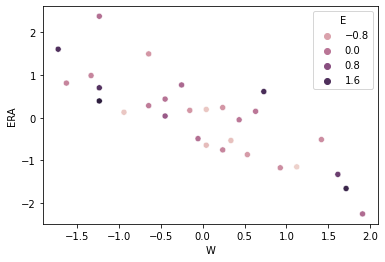

In [18]:
sns.scatterplot(x='W',y='ERA',hue='E',data=df_baseball)

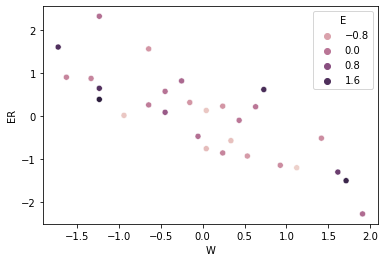

In [19]:
sns.scatterplot(x='W',y='ER',hue='E',data=df_baseball)

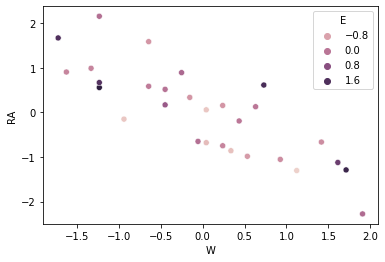

In [20]:
sns.scatterplot(x='W',y='RA',hue='E',data=df_baseball)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.42935304782897843
r2_score corresponding to random state:  43  is:  -1.4279092901155344
r2_score corresponding to random state:  44  is:  0.3946949556592788
r2_score corresponding to random state:  45  is:  0.09932416391453047
r2_score corresponding to random state:  46  is:  0.6891260221610489
r2_score corresponding to random state:  47  is:  -0.3242858094229675
r2_score corresponding to random state:  48  is:  -0.5942679517590863
r2_score corresponding to random state:  49  is:  -0.36277763388916284
r2_score corresponding to random state:  50  is:  0.7725464749312101
r2_score corresponding to random state:  51  is:  0.6585122184343859
r2_score corresponding to random state:  52  is:  0.3990676379979732
r2_score corresponding to random state:  53  is:  0.16898515723467333
r2_score corresponding to random state:  54  is:  -0.099789892076809
r2_score corresponding to random state:  55  is:  0.7614961370011761
r2_score corresponding to 

Using Logistic Regression found best r2_score corresponding to random state:  73  is:  0.8514870243340483


In [22]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(), x, y, cv=5,scoring="r2").mean()

0.028837972270180014

In [23]:
from sklearn.svm import SVR
import warnings 
warnings.filterwarnings("ignore") 
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    svr = SVR()
    svr.fit(x_train,y_train)
    y_pred = svr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.3377745585115687
r2_score corresponding to random state:  43  is:  -0.029905973577663003
r2_score corresponding to random state:  44  is:  0.3901115604428883
r2_score corresponding to random state:  45  is:  0.019565161764334094
r2_score corresponding to random state:  46  is:  0.5061408047111867
r2_score corresponding to random state:  47  is:  0.580989763122532
r2_score corresponding to random state:  48  is:  0.42769457660651733
r2_score corresponding to random state:  49  is:  -1.5237421170125307
r2_score corresponding to random state:  50  is:  0.21026003753646327
r2_score corresponding to random state:  51  is:  0.3424332607016809
r2_score corresponding to random state:  52  is:  0.1488104429940379
r2_score corresponding to random state:  53  is:  0.3745851812358054
r2_score corresponding to random state:  54  is:  0.5038825729561984
r2_score corresponding to random state:  55  is:  0.5644813342808126
r2_score corresponding to r

Using SVM found best r2_score corresponding to random state:  82  is:  0.6399468776841712

In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, x, y, cv=5,scoring="r2").mean()

-0.25238302836879734

In [25]:
from sklearn.ensemble import RandomForestRegressor
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    y_pred = rfr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.4677449826989619
r2_score corresponding to random state:  43  is:  0.17048048113723346
r2_score corresponding to random state:  44  is:  0.5762796666666665
r2_score corresponding to random state:  45  is:  -0.0155411552346576
r2_score corresponding to random state:  46  is:  0.7927091822750114
r2_score corresponding to random state:  47  is:  0.7723810739436623
r2_score corresponding to random state:  48  is:  0.737973831775701
r2_score corresponding to random state:  49  is:  -0.6380716385801357
r2_score corresponding to random state:  50  is:  0.2886079545454544
r2_score corresponding to random state:  51  is:  0.47825346733668317
r2_score corresponding to random state:  52  is:  0.3202182904961144
r2_score corresponding to random state:  53  is:  0.646137519623234
r2_score corresponding to random state:  54  is:  0.6635996441281138
r2_score corresponding to random state:  55  is:  0.5796335738701099
r2_score corresponding to random

Using RandomForestRegressor found max r2 score corresponding to  46  is  0.8202883508451346

In [26]:
rfr.base_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfr, x, y, cv=5,scoring="r2").mean()

-0.6278562218867554

In [28]:
from sklearn.neighbors import KNeighborsRegressor
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  0.35411764705882354
r2_score corresponding to random state:  43  is:  0.5471623838162931
r2_score corresponding to random state:  44  is:  0.7985333333333333
r2_score corresponding to random state:  45  is:  0.2942960288808666
r2_score corresponding to random state:  46  is:  0.6308451347647328
r2_score corresponding to random state:  47  is:  0.6032394366197183
r2_score corresponding to random state:  48  is:  0.702803738317757
r2_score corresponding to random state:  49  is:  -0.8384223736106131
r2_score corresponding to random state:  50  is:  0.11678321678321668
r2_score corresponding to random state:  51  is:  0.7690050251256282
r2_score corresponding to random state:  52  is:  0.6644590555887628
r2_score corresponding to random state:  53  is:  0.464464678178964
r2_score corresponding to random state:  54  is:  0.7085409252669039
r2_score corresponding to random state:  55  is:  0.34234713254842386
r2_score corresponding to random

Using KNeighborsRegressor found best r2_score corresponding to random state:  44  is:  0.7985333333333333

In [29]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn, x, y, cv=5,scoring="r2").mean()

-0.020669358607313358

In [30]:
from sklearn.tree import DecisionTreeRegressor
max_r_score=0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
    dr=DecisionTreeRegressor()
    dr.fit(x_train,y_train)
    y_pred = dr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2 score corresponding to ",final_r_state," is ",max_r_score)

r2_score corresponding to random state:  42  is:  -0.09688581314878908
r2_score corresponding to random state:  43  is:  -0.8141060688901041
r2_score corresponding to random state:  44  is:  -0.10666666666666669
r2_score corresponding to random state:  45  is:  -0.39440433212996395
r2_score corresponding to random state:  46  is:  0.2900867976244862
r2_score corresponding to random state:  47  is:  0.7081866197183099
r2_score corresponding to random state:  48  is:  0.3271028037383179
r2_score corresponding to random state:  49  is:  -0.8350663320186449
r2_score corresponding to random state:  50  is:  -1.407342657342657
r2_score corresponding to random state:  51  is:  -0.42914572864321654
r2_score corresponding to random state:  52  is:  -1.1303048416019128
r2_score corresponding to random state:  53  is:  0.4235478806907378
r2_score corresponding to random state:  54  is:  -0.8896797153024911
r2_score corresponding to random state:  55  is:  0.261678693505507
r2_score corresponding 

Using DecisionTreeRegressor found max r2 score corresponding to  65  is  0.7940536620739667

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(dr, x, y, cv=5,scoring="r2").mean()

-2.067744103865928

In [32]:

import xgboost
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [33]:
## Hyper Parameter Optimization
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [34]:
# Set up the random search with 4-fold cross validation
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [35]:
random_cv.fit(x_train,y_train)
random_cv.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    4.8s


[16:16:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:    9.6s finished


XGBRegressor(base_score=1, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [36]:

regressor=xgboost.XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [37]:
regressor.fit(x_train,y_train)

[16:16:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.25, booster='gblinear', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=4, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [38]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
y_pred=regressor.predict(x_test)
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.5067050177599717
RMSE is :  0.5111370895227432


In [39]:
#since maximum r2 score is comming around random state 47 we will use that to create our final model
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 47,test_size=0.20)
dr=DecisionTreeRegressor()
dr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

In [40]:
#Lets evaluate RMSE and r2 score using sklearn library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
print("r2 score is: ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is:  0.9627372799295774
RMSE is :  0.21254956943715894


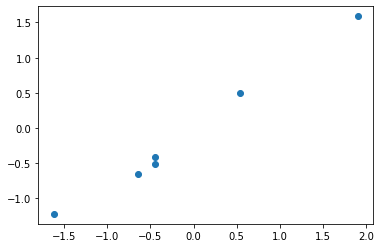

In [41]:
plt.scatter(y_test,y_pred)

As per aboved graph linearly distrubuted between test and predicted value.

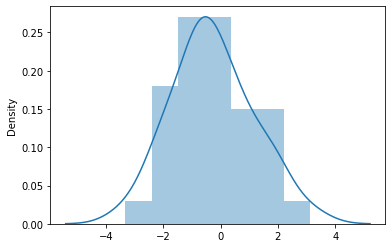

In [42]:
predictions=dr.predict(x_test)
sns.distplot(np.array(y_test)-predictions)

Display distplot between predicted and test value found normally disdtrubuted.

In [43]:
#Lets save the model using joblib and pickle
import joblib
import pickle
joblib.dump(dr, 'dr_baseball.obj')
pickle.dump(dr,open('dr_baseball.pkl','wb'))

Dump the module using both pickle and joblib.